In [23]:
# Linear Regression using sklearn, Optimization, and Regularization

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

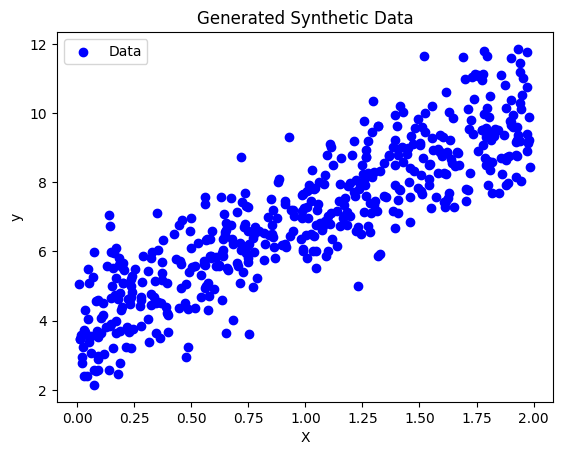

In [24]:
# --- 1. Generate Synthetic Data ---
np.random.seed(42)
X = 2 * np.random.rand(500, 1)
y = 4 + 3 * X + np.random.randn(500, 1)  # true relation: y = 4 + 3x + noise

plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Synthetic Data')
plt.legend()
plt.show()



Learned parameters:
Intercept: [3.89294835]
Coefficient: [[3.11500231]]


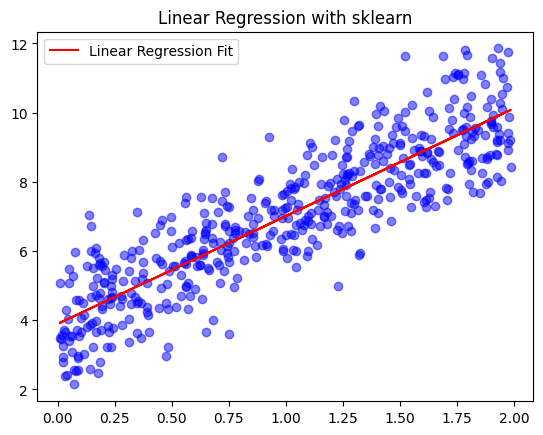

In [25]:
# --- 2. Linear Regression using sklearn ---
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Learned parameters:")
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, lin_reg.predict(X), color='red', label='Linear Regression Fit')
plt.legend()
plt.title('Linear Regression with sklearn')
plt.show()

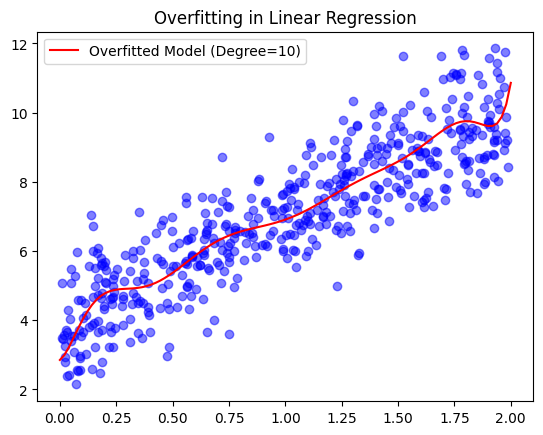

Train MSE: 0.9450472155330406
Test MSE: 1.1583467209855403


In [27]:
# --- 3. Overfitting Example ---
# Create polynomial features to simulate overfitting
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train, y_train)

plt.scatter(X, y, color='blue', alpha=0.5)
X_line = np.linspace(0, 2, 100).reshape(100, 1)
X_line_poly = poly.transform(X_line)
y_pred_line = lin_reg_poly.predict(X_line_poly)
plt.plot(X_line, y_pred_line, color='red', label='Overfitted Model (Degree=10)')
plt.legend()
plt.title('Overfitting in Linear Regression')
plt.show()

print('Train MSE:', mean_squared_error(y_train, lin_reg_poly.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, lin_reg_poly.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.154e+01, tolerance: 1.607e-01
  model = cd_fast.enet_coordinate_descent(


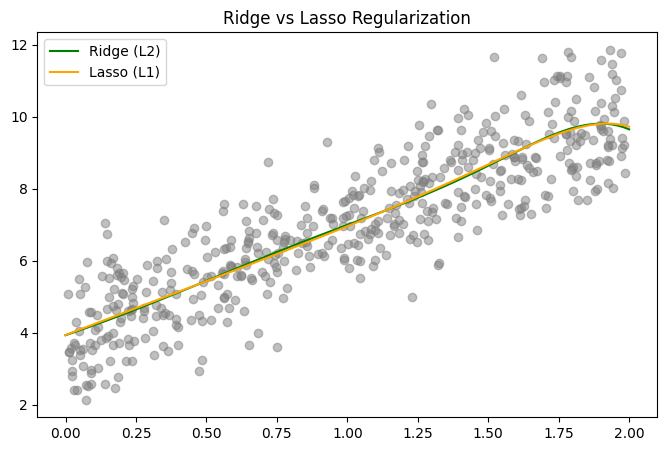

Ridge Test MSE: 1.0738314813316412
Lasso Test MSE: 1.0696198174969513


In [29]:
# --- 4. Regularization: Ridge and Lasso ---
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='gray', alpha=0.5)
plt.plot(X_line, ridge_reg.predict(X_line_poly), color='green', label='Ridge (L2)')
plt.plot(X_line, lasso_reg.predict(X_line_poly), color='orange', label='Lasso (L1)')
plt.legend()
plt.title('Ridge vs Lasso Regularization')
plt.show()

print('Ridge Test MSE:', mean_squared_error(y_test, ridge_reg.predict(X_test)))
print('Lasso Test MSE:', mean_squared_error(y_test, lasso_reg.predict(X_test)))

In [30]:
# --- 5. Class Activity ---
print("--- CLASS ACTIVITY ---\n")
print("1)Change the polynomial degree (e.g., 5, 10, 20) and observe underfitting/overfitting.\n")
print("2)Adjust Ridge alpha values (0.001 → 10).\n")
print("3)Compare Ridge vs Lasso visually — which gives a smoother curve?\n")
print("4)Discuss: Why does regularization improve generalization even with high-degree models?\n")

--- CLASS ACTIVITY ---

1)Change the polynomial degree (e.g., 5, 10, 20) and observe underfitting/overfitting.

2)Adjust Ridge alpha values (0.001 → 10).

3)Compare Ridge vs Lasso visually — which gives a smoother curve?

4)Discuss: Why does regularization improve generalization even with high-degree models?

